## 8. Neural networks and deep learning
This week, we'll learn about neural nets and build a model for classifying images of clothes

### 8.1 Fashion classification
Dataset:

- Full: https://github.com/alexeygrigorev/clothing-dataset
- Small: https://github.com/alexeygrigorev/clothing-dataset-small
- Links: https://cs231n.github.io/

In [1]:
%pip uninstall -y numpy matplotlib tensorflow keras
%pip install numpy matplotlib tensorflow keras

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: matplotlib 3.9.3
Uninstalling matplotlib-3.9.3:
  Successfully uninstalled matplotlib-3.9.3
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.7.0
Uninstalling keras-3.7.0:
  Successfully uninstalled keras-3.7.0
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached matplotlib-3.9.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached tensorflow-2.18.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
Using ca

Note: you may need to restart the kernel to use updated packages.


In [2]:
%autosave 0

Autosave disabled


In [3]:
#to be run in the command line in this folder
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git 


fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


### 8.2 TensorFlow and Keras

- Installing TensorFlow
- Loading images

In [4]:
!python -m pip install --upgrade pip

    kubernetes (>=9.0.0a1.0) ; extra == 'all_extras'
               ~~~~~~~~~~^


In [5]:
%pip install scipy
%pip install tensorflow

    kubernetes (>=9.0.0a1.0) ; extra == 'all_extras'
               ~~~~~~~~~~^
Note: you may need to restart the kernel to use updated packages.
    kubernetes (>=9.0.0a1.0) ; extra == 'all_extras'
               ~~~~~~~~~~^
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade numpy pandas

    kubernetes (>=9.0.0a1.0) ; extra == 'all_extras'
               ~~~~~~~~~~^
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install numpy==1.24 pandas==1.5

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img # type: ignore

%matplotlib inline

2024-12-02 15:38:54.360740: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 15:38:54.362831: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-02 15:38:54.366551: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-02 15:38:54.378222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733153934.397890     770 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733153934.40

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/saturncloud/envs/saturn/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/saturncloud/envs/saturn/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/traitlets/config/application.py", line 978, in launch_instance
    ap

AttributeError: _ARRAY_API not found

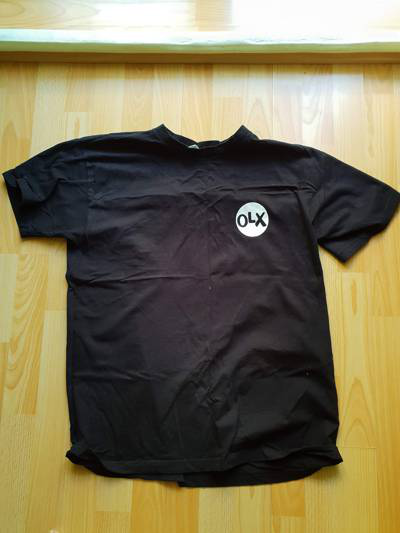

In [8]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)


Possible image sizes: 299 x 299, 229 x 229, 150 x 150.

In [9]:
img = load_img(fullname, target_size=(299, 299)) #we can use target size to resize the image depending on what we need for the neural network 

Transform an image from keras to a numpy array which represents the image rgb values, each value is between 0 and 255, 0 being black and 255 being white, and the values in between are the different shades of grey. Each value is a pixel in the image, and the image is a 3D array. 

In [10]:
x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

The type uint8 means the values ranges from 0 to 255 instead of -127 to +128. Its an integer that takes 8 bits ( 1 byte).

In [11]:
x.shape

(299, 299, 3)

In [12]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F8AE6BE95E0>


### 8.3 Pre-trained convolutional neural networks

This is a list with available pretrained models, most of them are trained with imagenet data: https://keras.io/api/applications/

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [13]:
from tensorflow.keras.applications.xception import Xception # type: ignore
from tensorflow.keras.applications.xception import preprocess_input # type: ignore
from tensorflow.keras.applications.xception import decode_predictions # type: ignore

In [14]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

W0000 00:00:1733153936.486399     770 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


This model expects multiple images, so lets create an array with 1 image

In [15]:
# X = np.array([x,x,x]) this would create an array of 3 images
X = np.array([x])

In [16]:
# 1 image of 299x299 pixels with 3 channels
X.shape

(1, 299, 299, 3)

we will use the preprocess_input function, which is necessary to call before predicting the model. 

In [17]:
X = preprocess_input(X)

In [18]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [19]:
pred.shape
#This is the probability of each image to be part of one class

(1, 1000)

In [20]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', np.float32(0.67924416)),
  ('n02916936', 'bulletproof_vest', np.float32(0.039600335)),
  ('n04370456', 'sweatshirt', np.float32(0.035299648)),
  ('n03710637', 'maillot', np.float32(0.010884154)),
  ('n04525038', 'velvet', np.float32(0.001805764))]]

### 8.4 Convolutional neural networks
- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: https://cs231n.github.io/

Feature map is the similarity of one image to the filter - higher values mean higher degree of similarity for the filter and the part of the image. 
We can have multiple feature maps, 1 per filter. The output of 1 CNN, we can treat it as a image, and apply a second CNN, and so on. 

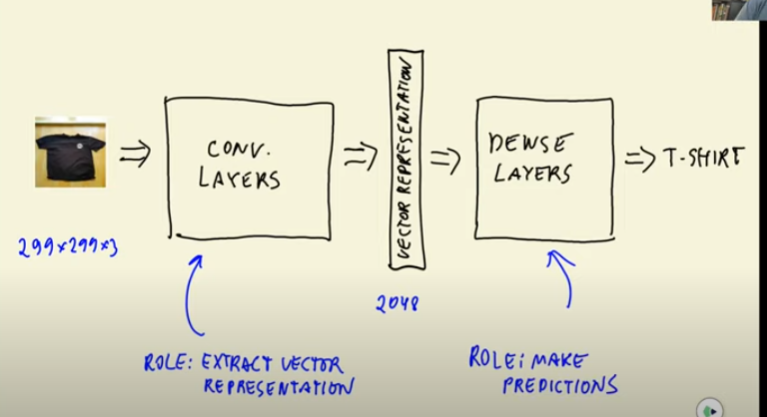

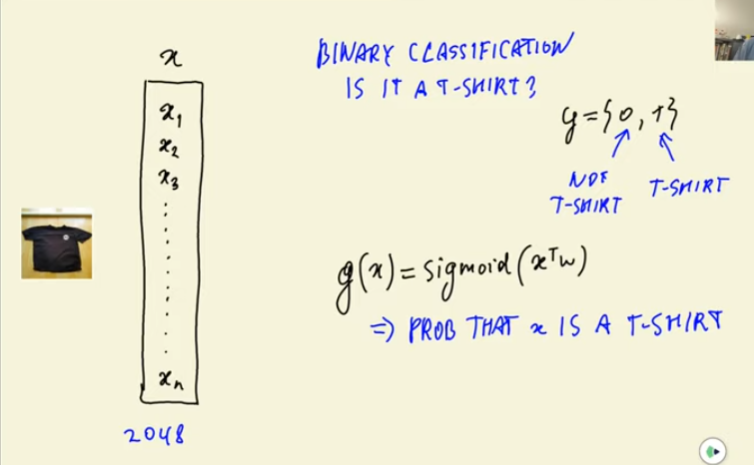

Multiclassification

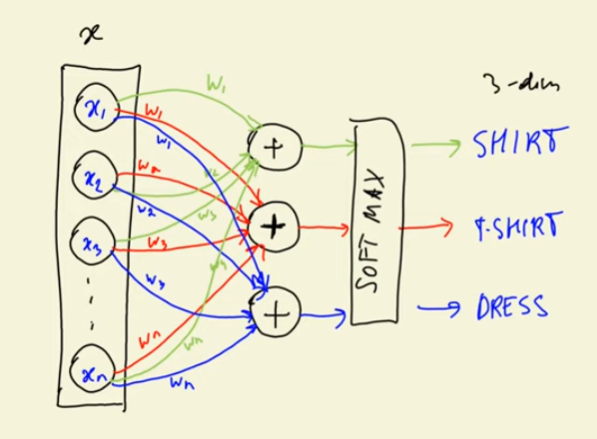
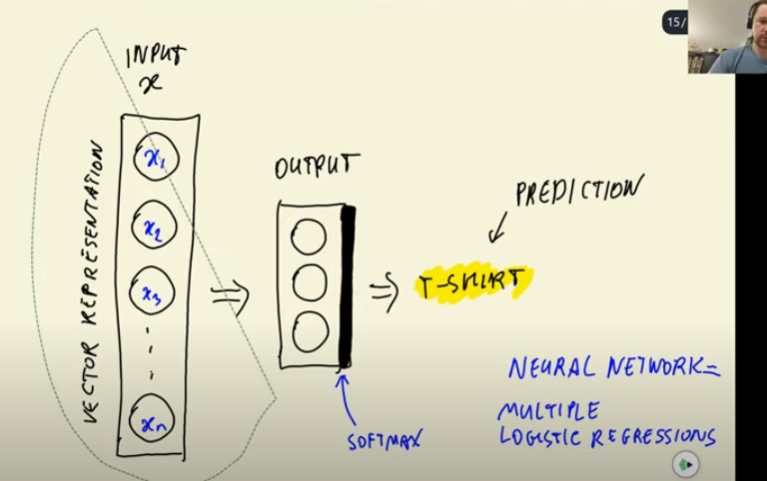

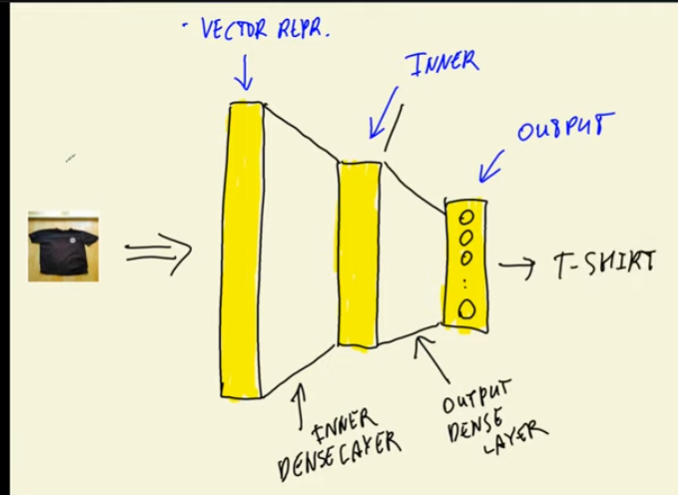
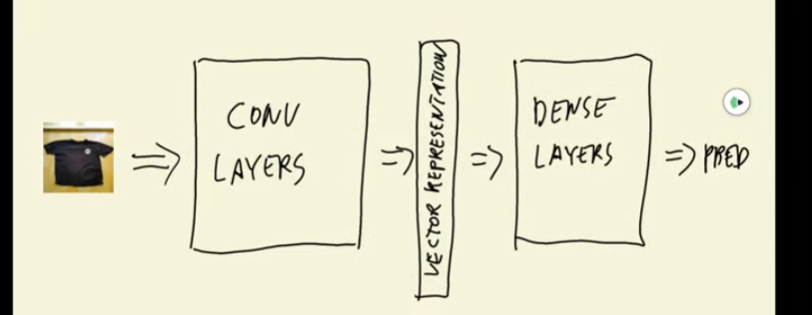

### 8.5 Transfer learning
- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)

(Better to run it with a GPU)

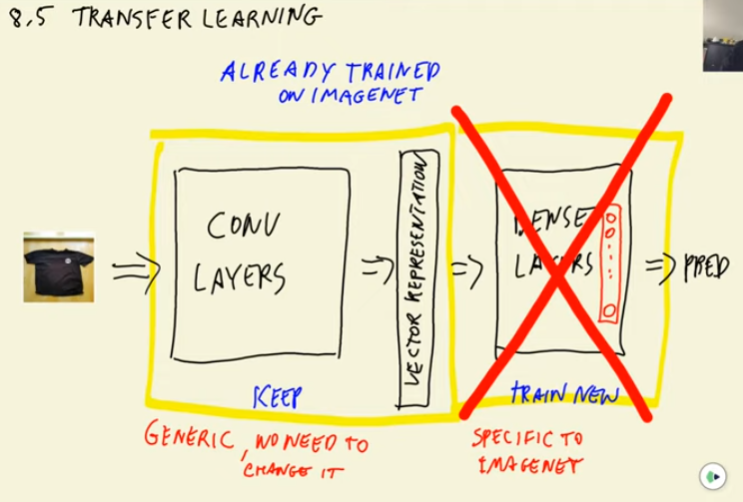

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

In [22]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# to read from the directory and apply the preprocessing function
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32   #how many images at once we want to load into the batch
)

Found 3068 images belonging to 10 classes.


In [23]:
train_ds.class_indices #this is the mapping of the classes to the indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [24]:
!ls -l ./clothing-dataset-small/train

total 276
drwxrwsr-x 2 jovyan jovyan 20480 Dec  2 02:06 dress
drwxrwsr-x 2 jovyan jovyan 12288 Dec  2 02:06 hat
drwxrwsr-x 2 jovyan jovyan 36864 Dec  2 02:06 longsleeve
drwxrwsr-x 2 jovyan jovyan 16384 Dec  2 02:06 outwear
drwxrwsr-x 2 jovyan jovyan 36864 Dec  2 02:06 pants
drwxrwsr-x 2 jovyan jovyan 20480 Dec  2 02:06 shirt
drwxrwsr-x 2 jovyan jovyan 16384 Dec  2 02:06 shoes
drwxrwsr-x 2 jovyan jovyan 20480 Dec  2 02:06 shorts
drwxrwsr-x 2 jovyan jovyan 12288 Dec  2 02:06 skirt
drwxrwsr-x 2 jovyan jovyan 65536 Dec  2 02:06 t-shirt


In [25]:
# Install numpy
%pip install numpy
# Import numpy
import numpy 

    kubernetes (>=9.0.0a1.0) ; extra == 'all_extras'
               ~~~~~~~~~~^
Note: you may need to restart the kernel to use updated packages.


In [26]:
X, y = next(train_ds)
    

In [27]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

This applies one hot encoding, so for example 1st row is refering to 1 being a dress, 2nd row is shirt, etc.

In [28]:
#Load validation data set

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


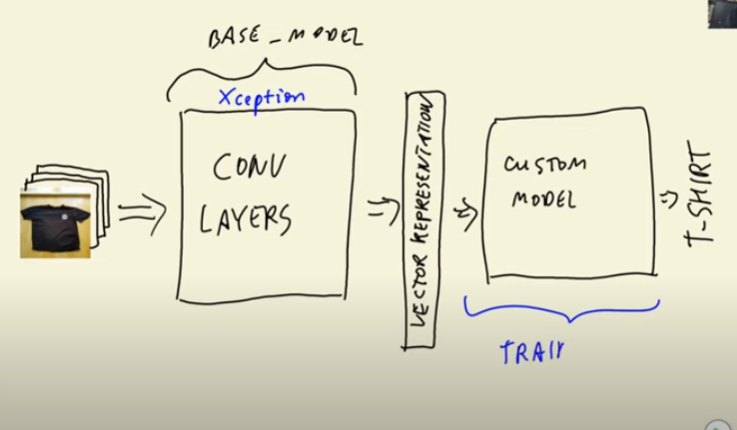

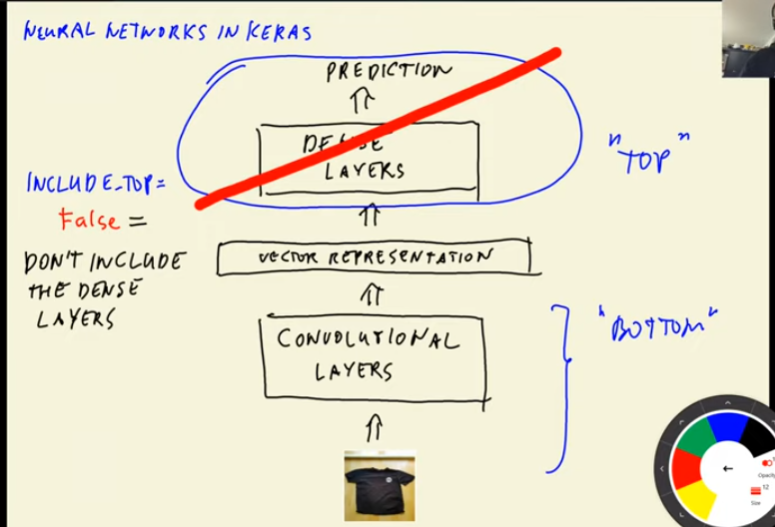

In [29]:
#We have the data now lets train our custom model on top of that
base_model = Xception(
    weights='imagenet',  #we are using the weights from the imagenet dataset
    include_top=False,   #keeping just the CNN and not the dense layer
    input_shape=(150, 150, 3)
)

base_model.trainable = False  #we don't want to train the or change the convolutational layers

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)  #this gives us a 3D vector - we need to put training false here as well

vectors = keras.layers.GlobalAveragePooling2D()(base) #applying pooling to reduce the dimensions from 3D to 2D and get the vector representation

#number 10 means we have 10 dif classes. 
#Now use the vectors representation to apply dense layer
outputs = keras.layers.Dense(10)(vectors)  #now the outputs are the vectors

model = keras.Model(inputs, outputs) #and finally we create the model with the vectors

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [30]:
preds = model.predict(X)
preds[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([ 0.63135594, -0.27388108,  0.3206149 ,  0.28044555, -0.23468325,
        0.42412546,  1.1470097 ,  1.2337632 , -0.20670709, -0.1448743 ],
      dtype=float32)

Read about optimizers: https://keras.io/api/optimizers/

Loss is the mesure of how good the deep learning model is. 
- For keras.losses we use CategoricalCrossEntropy because is a multiclass problem, for binary we use BinaryCrossEntropy, for regression we use MeanSquaredError. 

In [31]:
learning_rate = 0.01

#we could use multiple parameters, but for now we are just using the learning rate
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

#Loss tells us how good the model is 
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [32]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 798ms/step - accuracy: 0.5817 - loss: 1.6590 - val_accuracy: 0.7537 - val_loss: 1.0605
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 778ms/step - accuracy: 0.8250 - loss: 0.6039 - val_accuracy: 0.7654 - val_loss: 1.0404
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 776ms/step - accuracy: 0.8855 - loss: 0.3282 - val_accuracy: 0.8094 - val_loss: 0.8165
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 779ms/step - accuracy: 0.9274 - loss: 0.1905 - val_accuracy: 0.8065 - val_loss: 0.8271
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 776ms/step - accuracy: 0.9321 - loss: 0.1940 - val_accuracy: 0.8152 - val_loss: 0.8619
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 775ms/step - accuracy: 0.9711 - loss: 0.0946 - val_accuracy: 0.8211 - val_loss: 0.8757
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 775ms/step - accuracy: 0.9902 - loss: 0.0500 - val_accuracy: 0.8065 - val_loss: 0.8006
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 776ms/step - accuracy: 0.9905 - loss: 0.0436 - val_accu

accuracy close to 1 means it is overfitting to the data

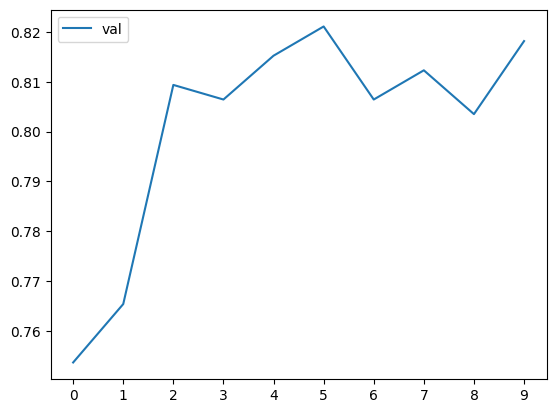

In [33]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

### 8.6 Adjusting the learning rate
- What's the learning rate: 
Lets think is how fast you can read, but if you go too fast it means you didnt read well just went through the content table and not read detailed  information.
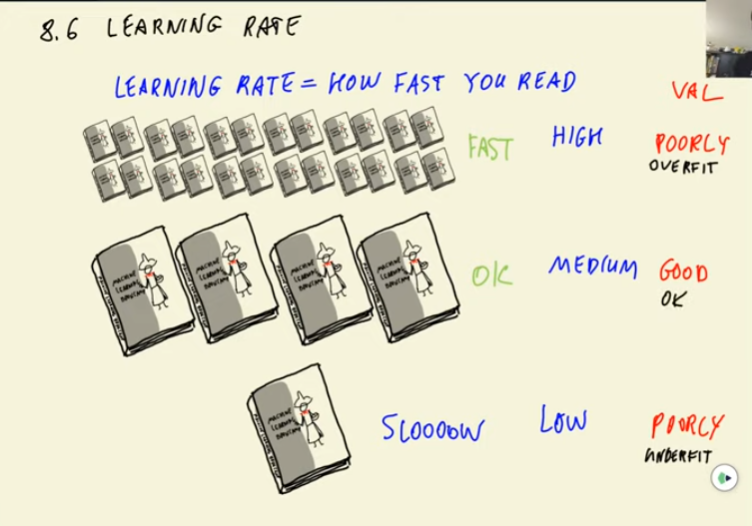

- Trying different values

In [34]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################
    #call this function create architecture

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [35]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 786ms/step - accuracy: 0.2272 - loss: 2.1288 - val_accuracy: 0.4809 - val_loss: 1.6085
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 772ms/step - accuracy: 0.5330 - loss: 1.4434 - val_accuracy: 0.6246 - val_loss: 1.2509
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 777ms/step - accuracy: 0.6108 - loss: 1.1964 - val_accuracy: 0.6950 - val_loss: 1.0672
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 789ms/step - accuracy: 0.6821 - loss: 0.9933 - val_accuracy: 0.7273 - val_loss: 0.9578
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 773ms/step - accuracy: 0.6983 - loss: 0.9335 - val_accuracy: 0.7507 - val_loss: 0.8856
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 773ms/step - accuracy: 0.7295 - loss: 0.8430 - val_accuracy: 0.7566 - val_loss: 0.8301
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 771ms/step - accuracy: 0.7287 - loss: 0.8054 - val_accuracy: 0.7683 - val_loss: 0.7926
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 770ms/step - accuracy: 0.7567 - loss: 0.7618 - v

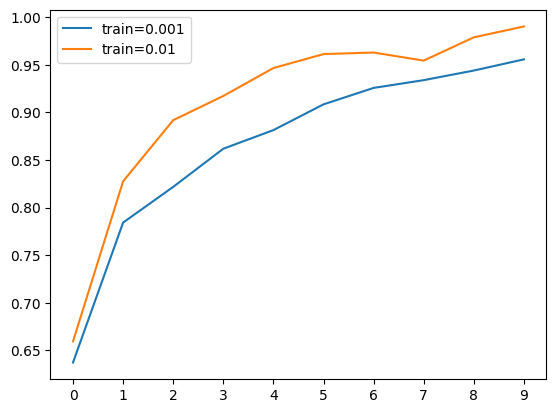

In [40]:
#Check plot for train accuracy
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    #plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

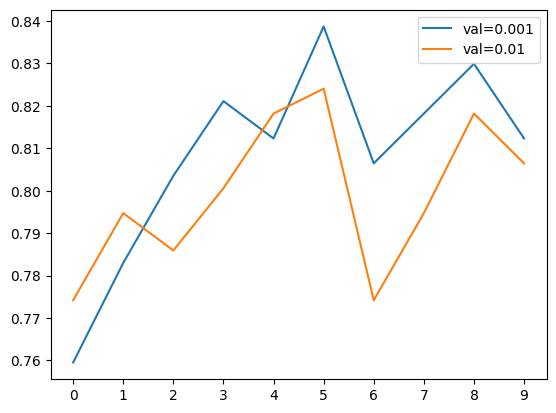

In [41]:
#Check plot for validation accuracy
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [39]:
#Lets check only 0.01 and 0.001 which seem to be the best accuracy 
del scores[0.1]
del scores[0.0001]

In [42]:
#Based on the plot with val_accuracy, blue line lr 0.001 performs better than 0.01
learning_rate = 0.001

### 8.7 Checkpointing

* Saving the best model only after certain conditions are met
* Training a model with callbacks

A callback is code we invoke after each epoch finishes


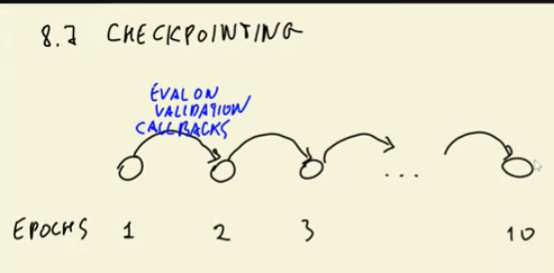

In [48]:
model.save_weights('model_v1.weights.h5') #saving in a binary format for keras models

In [49]:
#this callback is named checkpoint
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [50]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 793ms/step - accuracy: 0.5071 - loss: 1.4625 - val_accuracy: 0.7830 - val_loss: 0.7116
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 779ms/step - accuracy: 0.7831 - loss: 0.6446 - val_accuracy: 0.7918 - val_loss: 0.6120
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 779ms/step - accuracy: 0.8353 - loss: 0.5103 - val_accuracy: 0.8006 - val_loss: 0.5727
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 779ms/step - accuracy: 0.8598 - loss: 0.4307 - val_accuracy: 0.8094 - val_loss: 0.5521
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 780ms/step - accuracy: 0.8805 - loss: 0.3857 - val_accuracy: 0.8211 - val_loss: 0.5509
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 773ms/step - accuracy: 0.8978 - loss: 0.3320 - val_accuracy: 0.8182 - val_loss: 0.5220
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 774ms/step - accuracy: 0.9215 - loss: 0.2897 - val_accuracy: 0.8123 - val_loss: 0.5209
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 774ms/step - accuracy: 0.9462 - loss: 0.2372 - val_accu

### 8.8 Adding more layers
* Adding one inner dense layer
* Experimenting with different sizes of inner layer

The dense layer gives us raw scores (values) but to get the probability we need activation which for these would be softmax
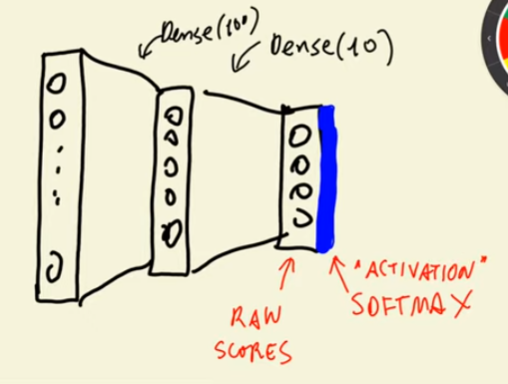

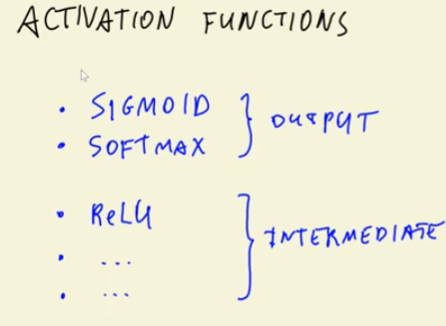

final architecture

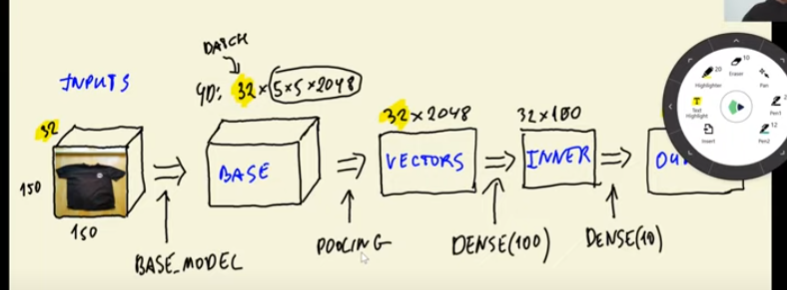

In [51]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    #now from the vector representation we go to the inner layer
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    #the inner layer will be used to apply dense layer
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    #we are not using softmax, thats why from_legits=True, bcz we use raw scores
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) 

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [52]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 785ms/step - accuracy: 0.3002 - loss: 1.9290 - val_accuracy: 0.6070 - val_loss: 1.2435
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 772ms/step - accuracy: 0.5805 - loss: 1.1499 - val_accuracy: 0.7361 - val_loss: 0.8929
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 773ms/step - accuracy: 0.7690 - loss: 0.7404 - val_accuracy: 0.7859 - val_loss: 0.7103
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 773ms/step - accuracy: 0.8187 - loss: 0.5695 - val_accuracy: 0.7801 - val_loss: 0.6681
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 773ms/step - accuracy: 0.8304 - loss: 0.5212 - val_accuracy: 0.8094 - val_loss: 0.5962
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 772ms/step - accuracy: 0.8673 - loss: 0.4145 - val_accuracy: 0.8240 - val_loss: 0.5964
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 774ms/step - accuracy: 0.8951 - loss: 0.3526 - val_accuracy: 0.8182 - val_loss: 0.5658
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 773ms/step - accuracy: 0.9154 - loss: 0.3077 - val_a

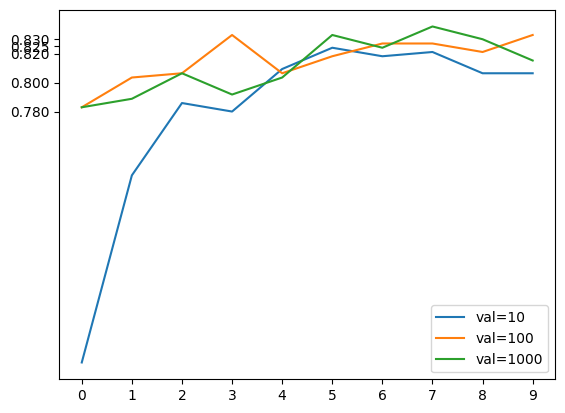

In [53]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

By adding one extra layer to the model, seems to get more complex and doesnt improve the accuracy. Theres no clear performance difference. 

### 8.9 Regularization and dropout
* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values
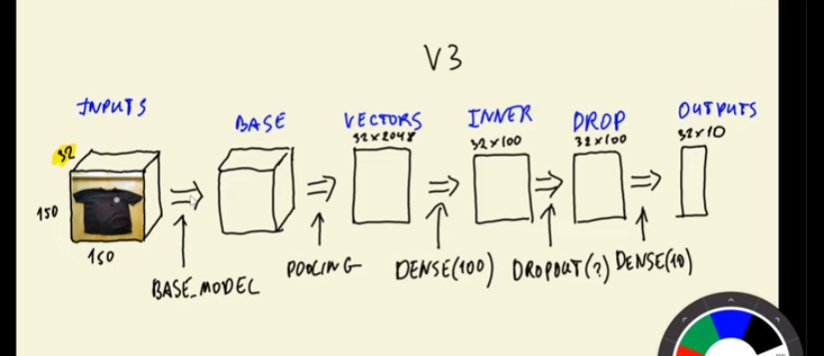

In [54]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    #add dropout inmediaetly after innerlayer
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [55]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )
    #at this point we need more epochs because CNN needs it to learn 
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 787ms/step - accuracy: 0.5692 - loss: 1.3015 - val_accuracy: 0.7918 - val_loss: 0.6334
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 771ms/step - accuracy: 0.8109 - loss: 0.5333 - val_accuracy: 0.7889 - val_loss: 0.5817
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 780ms/step - accuracy: 0.8954 - loss: 0.3469 - val_accuracy: 0.8035 - val_loss: 0.5552
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 773ms/step - accuracy: 0.9304 - loss: 0.2502 - val_accuracy: 0.7977 - val_loss: 0.5503
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 772ms/step - accuracy: 0.9567 - loss: 0.1811 - val_accuracy: 0.8123 - val_loss: 0.5404
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 775ms/step - accuracy: 0.9550 - loss: 0.1554 - val_accuracy: 0.8094 - val_loss: 0.5343
Epoch 7/30
53/96 ━━━━━━━━━━━━━━━━━━━━ 29s 694ms/step - accuracy: 0.9838 - loss: 0.0906

KeyboardInterrupt: 

Comparison  between results

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

In [ ]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

### 8.10 Data augmentation
* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

Treat it as hyperparameter

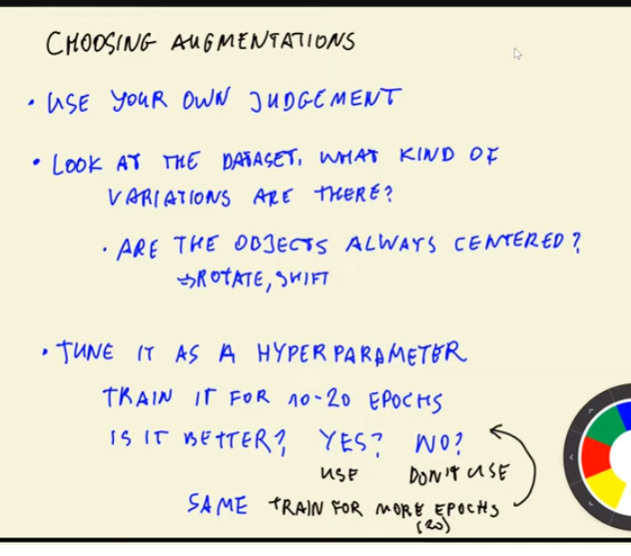

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

##We dont change validation at all, we keep it as is.
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

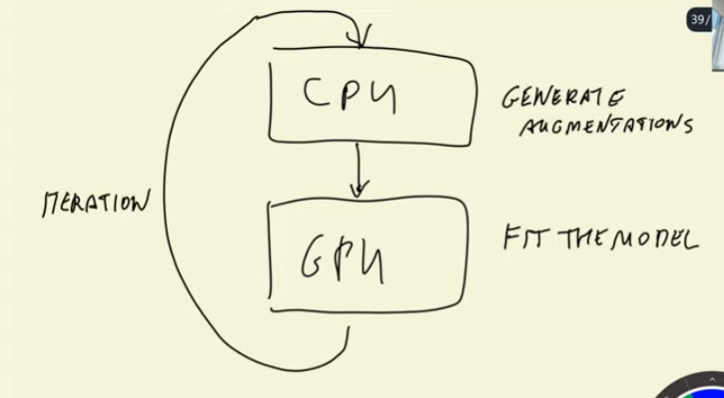
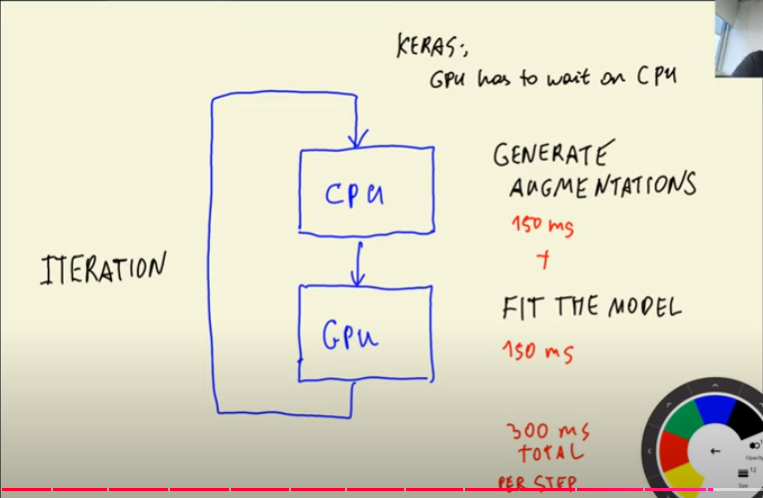

Recommended reading to build tensor flow input pipelines and improve GPU utilization: https://www.tensorflow.org/guide/data

In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

#now we have dropout, and data augmentation, so use more epochs
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

### 8.11 Training a larger model
* Train a 299x299 model

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
#Meaning 299x299 model size
input_size = 299

In [ ]:
#Data augmentation
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

In [ ]:
#Creating the checkpoint
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
#train model with parameters

learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

### 8.12 Using the model
* Loading the model
* Evaluating the model
* Getting predictions

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

In [ ]:
#Load the model saved on the folder as xception_v4_1_13_0.903.h5
model = keras.models.load_model('xception_v4_1_13_0.903.h5')

In [ ]:
model.evaluate(test_ds)

In [ ]:
# Apply the model to an image
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(299, 299))
img

In [ ]:
import numpy as np

#convert image to a numpy array
x = np.array(img)
X = np.array([x])
X.shape

In [ ]:
#preprocess array before predicting
X = preprocess_input(X)
pred = model.predict(X)

In [ ]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [ ]:
#Join the classes with its corresponding probability
#This values give the likelihood of the image to be one of those classes, the higher the value
#the higher the likelihood
dict(zip(classes, pred[0]))

### 8.13 Summary
* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

### 8.14 Explore more
* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images